# <center>        **Machine Learning (S1-22_DSECLZG565)-ASSIGNMENT**</center>

## Group No: 14

## Group Member Names:
1. Akanksha: 2021sc04343
2. Fahad Mehfooz: 2021sc04342
3. Shubhankar Barman: 2021sc04344
4. Subrata Samanta: 2021sc04140



# 1. Business Understanding

In order to ascertain the age of an abalone based on the information provided in our dataset, we must carefully analyze and consider the various attributes associated with each individual, including gender, length, diameter, height, whole weight, shucked weight, viscera weight, shell weight, and number of rings. By meticulously examining each of these factors, we can gain a comprehensive understanding of the abalone's growth and development over time, allowing us to accurately estimate their age with a high degree of precision and confidence.

## Aim
- To use this info to predict abalone's age.

### Importing Modules

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns  # Imorting Seaborn library
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor # load statmodels functions
from statsmodels.tools.tools import add_constant
import eli5
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.options.mode.chained_assignment = None


# 2. Data Acquisition

The data has been provided to us in google drive. The required data has been downloaded from:
https://drive.google.com/file/d/1NgfdUriW5pubYGjzpxZ4qWQTkZ_EX9Jy/view

## 2.1 Code for converting the above downloaded data into a dataframe

In [ ]:
# Reading data
file_name = "/Users/fahadmehfooz/Downloads/1_abalone.csv"
df = pd.read_csv(file_name)

## 2.2 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [ ]:

# Preview our data
df.head()

,Gender,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


## 2.2 Display the column headings, statistical information, description and statistical summary of the data.

In [ ]:
#printing datatypes of columns and null values in them
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [ ]:
#checking statistical information on the dataset
df.describe()

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


## 2.4 Write your observations from the above. 

1. Size of the dataset:

A1.) 4177*10

2. What type of data attributes are there?

A2.) object, float and int.

3. Is there any null data that has to be cleaned? 

A3. No.

In [ ]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  4177
Columns  :  10

Features : 
 ['Gender', 'length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt', 'rings', 'age']

Missing values :   0

Unique values :  
 Gender           3
length         134
diameter       111
height          51
whole_wt      2429
shucked_wt    1515
viscera_wt     880
shell_wt       926
rings           28
age             28
dtype: int64


### 2.5 User Defined Functions

In [ ]:
# This functions checks if a aprticular plot is left skewed, right skewed or normally distributed.
def check_distribution(df):
    """This function plots the distribution for continuous variables and also plots their skewness. """
    continuous = [column for column in df.columns if df[column].dtype!="object"]
    
    for column in df[continuous].columns:
        print(f"Skewness for the column is: {column}", df[column].skew())
        if  df[column].skew()>0:
            print("Distribution is right skewed.")
        elif  df[column].skew()<0:
            print("Distribution is left skewed.")
        else:
            print("Normally distributed.")

        sns.displot(df[column], kde = True)
        plt.show()

# This function would plot a heatmap for correlation
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    
    sns.set(rc={'figure.figsize':(10,7)});

    # Getting the Upper Triangle of the co-relation matrix
    matrix = np.triu(df.corr(numeric_only = True))

    # using the upper triangle matrix as mask 
    sns.heatmap(df.corr(numeric_only = True), annot=True, mask=matrix)
    plt.title("Heatmap for correlated features.");
    

# This function would find correlated features and delete them from the data
# Pearson correlation, also known as Pearson product-moment correlation coefficient, is a statistical measure used to quantify the degree of linear association or correlation between two continuous variables. It is denoted by the symbol "r" and ranges from -1 to +1, where -1 indicates a perfect negative correlation, 0 indicates no correlation, and +1 indicates a perfect positive correlation.
def find_correlated_features(dataset, threshold):
    # Here we would be returning those features which are correlated according to a specific threshold
    col_corr = set()
    cols = []
    corr_matrix = dataset.corr()
    print(f'A feature is correlated if they have a correlation greater than or equal to {threshold}')
    print()
    print('Correlated features are:')
    print()
    removed = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if ( abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                # getting the name of column1
                col1 = corr_matrix.columns[i]
                # getting the name of column2
                col2 = corr_matrix.columns[j] 
                colname = corr_matrix.columns[i] # getting the name of column
                print(f"'{col1}' and '{col2}' are correlated with a correlation value of:  {round(corr_matrix.iloc[i, j],2)}")
                print()
                cols.append(col1)
                cols.append(col2)
    return set(cols)
 
# compute the vif for all given features
# VIF stands for "Variance Inflation Factor". It is a statistical measure that is used to assess the degree of multicollinearity, or intercorrelation among predictor variables, in a regression analysis.
#VIF is calculated for each predictor variable in the model and values greater than 5 or 10 are often used as a rule of thumb for identifying variables with high multicollinearity. In general, a lower VIF value indicates a better model with less multicollinearity among predictor variables.
# we will pass in all the correlated features here and find the VIF for them
def calculate_vif(corr_features):
    
    X = df[corr_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif


## 2.6 Exploratory data analysis

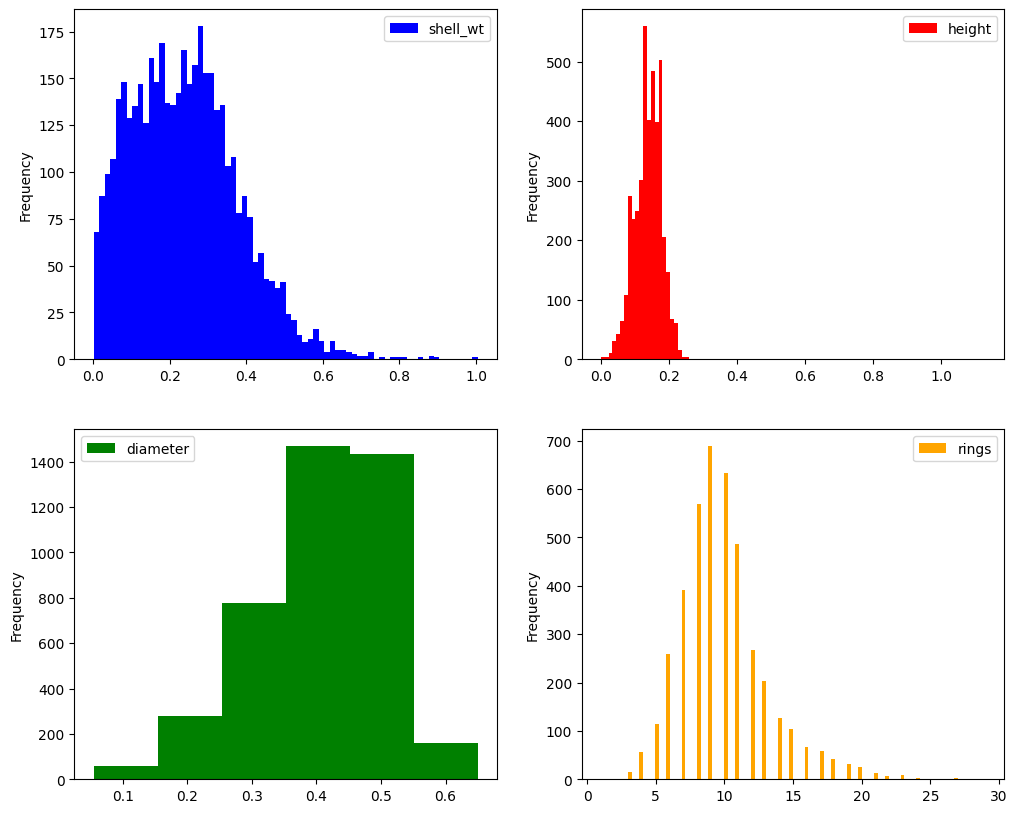

In [ ]:
# Creating histograms for shell wt, height, diameter and rings
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
df.plot(kind="hist", y="shell_wt", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="height", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="diameter", bins=6, color="g", ax=axes[1][0])
df.plot(kind="hist", y="rings", bins=100, color="orange", ax=axes[1][1])
plt.show()

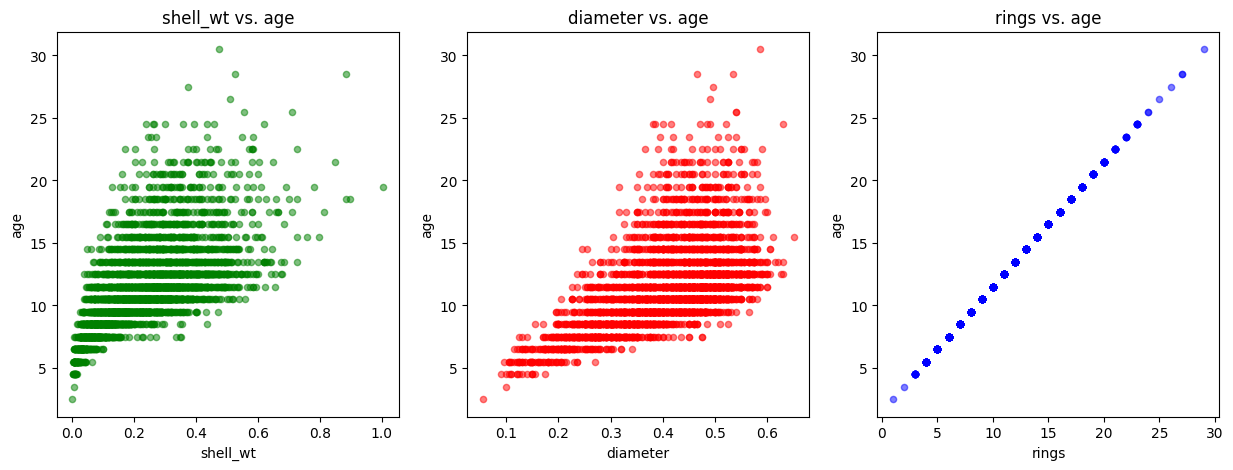

In [ ]:
# Creating scatter plots between Age vs independent features one at a time to see the relationship between them
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
df.plot(kind='scatter', x='shell_wt', y='age', alpha=0.5, color='green', ax=axes[0], title="shell_wt vs. age")
df.plot(kind='scatter', x='diameter', y='age', alpha=0.5, color='red', ax=axes[1], title="diameter vs. age")
df.plot(kind='scatter', x='rings', y='age', alpha=0.5, color='blue', ax=axes[2], title="rings vs. age")
plt.show()

<AxesSubplot: >

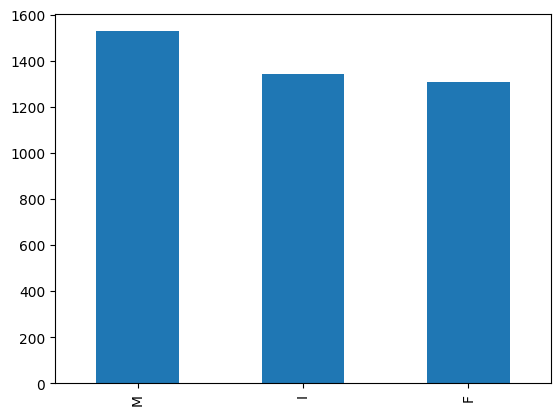

In [ ]:
# bar plot for gender to check the value distribution
df['Gender'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='rings', ylabel='age'>

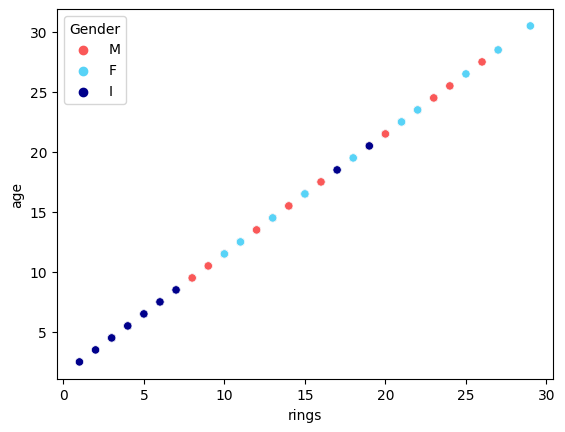

In [ ]:
# Scatter plot for rings vs age
pal = ["#FA5858", "#58D3F7","#00008B"]
sns.scatterplot(x="rings", y="age", data=df, palette=pal, hue='Gender')

<AxesSubplot: xlabel='shell_wt', ylabel='age'>

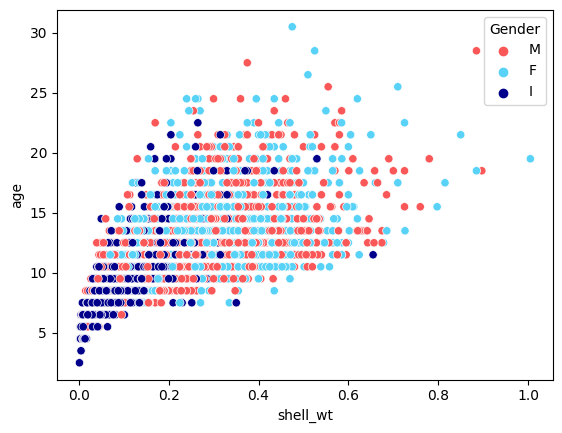

In [ ]:
# Scatter plot for shell wt, vs age

sns.scatterplot(x="shell_wt", y="age", data=df, palette=pal, hue='Gender')

Text(0.5, 1.0, 'Gender')

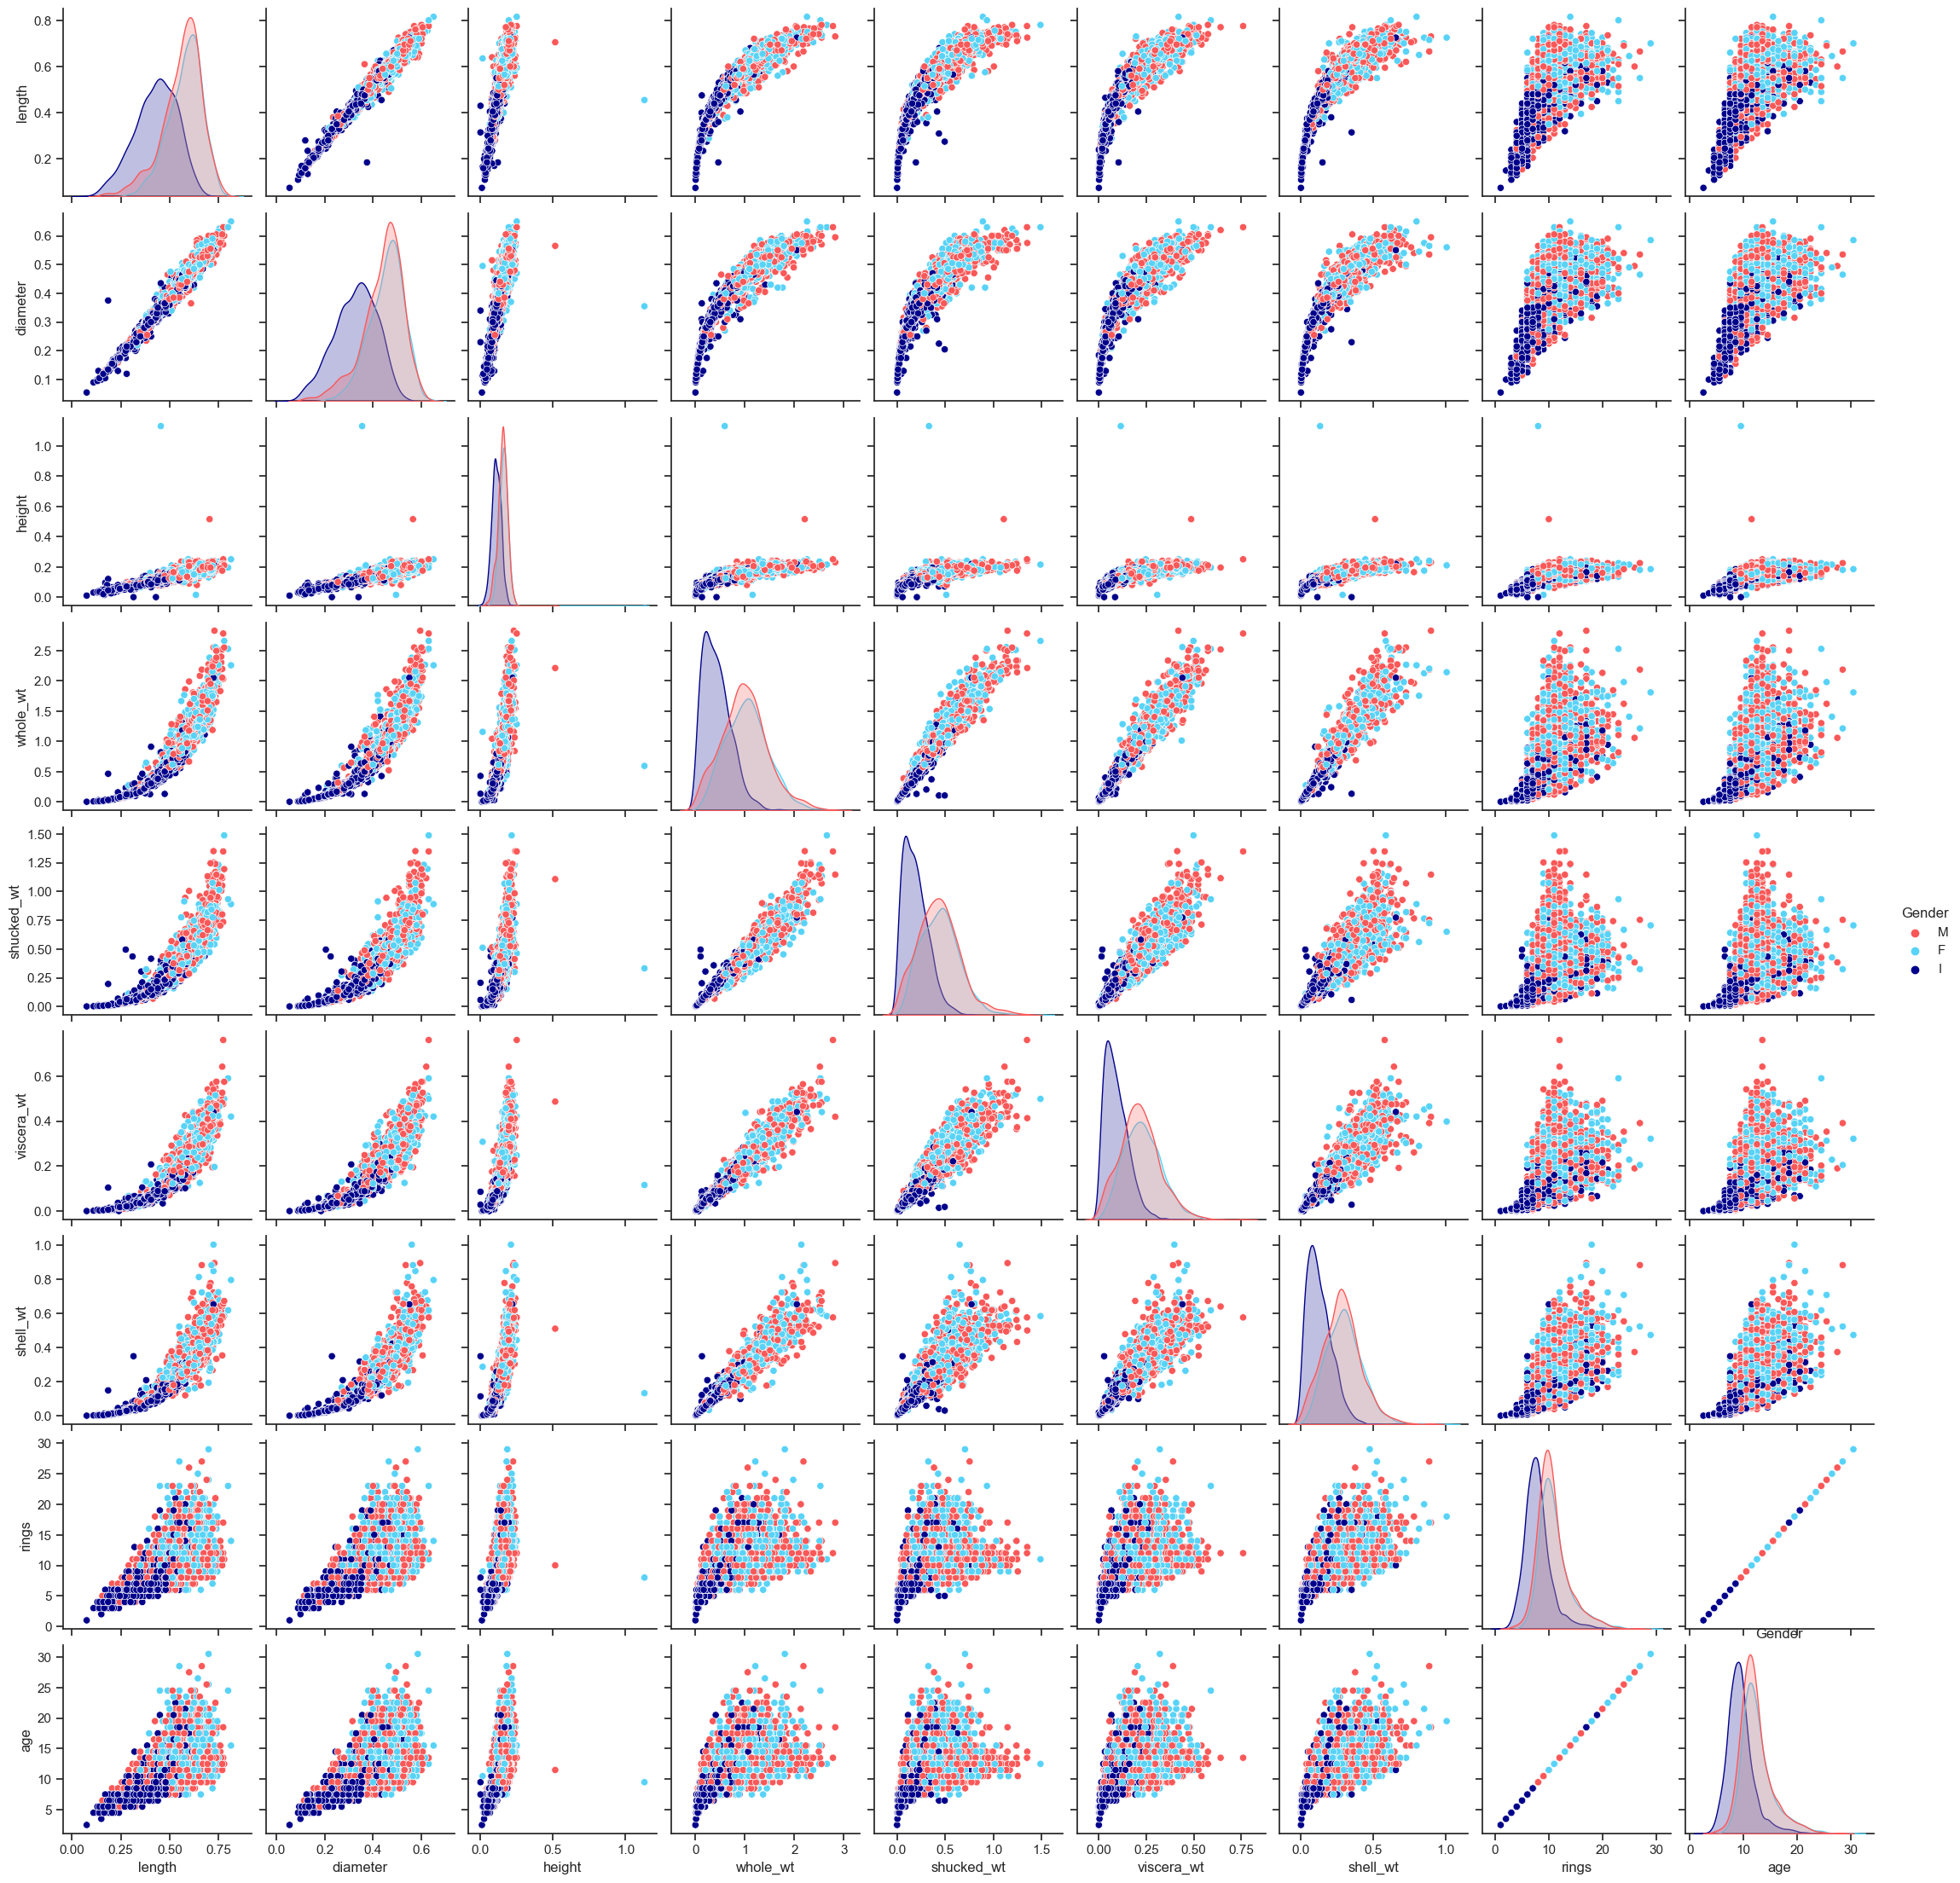

In [ ]:
# Creating pair plots
sns.set(style="ticks")

sns.pairplot(df, hue="Gender", palette=pal)
plt.title("Gender")

#### 2.7 Checking Correlation between Independent variables

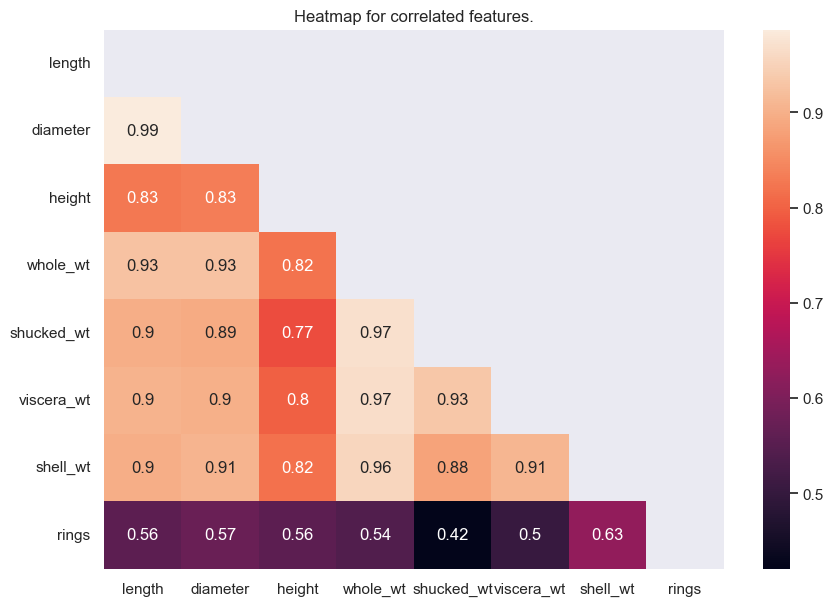

In [ ]:
# Checking for multicollineaity among our independent variables
plot_corr(df.drop(["age"], axis = 1))

> We have correlated features. Anything here over .80 would be a strong correlation. Since its linear regression, we need to satisfy the assumption of no multicollinearity between the independent features. Thus we need to either drop one of the correlated variables or combine them.

> Let's further inspect them again using VIF in data prep.

### 2.8 Checking distribution of columns

Skewness for the column is: length -0.639873268981801
Distribution is left skewed.


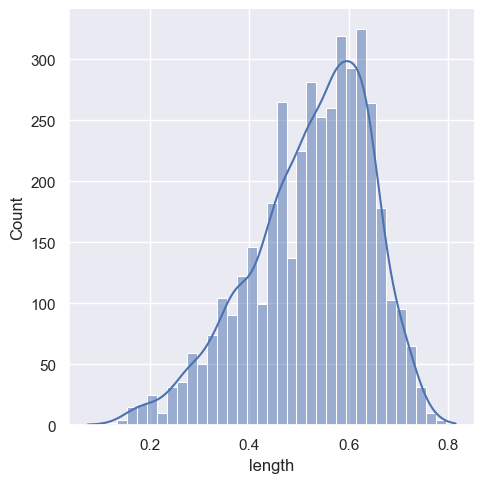

Skewness for the column is: diameter -0.6091981423290918
Distribution is left skewed.


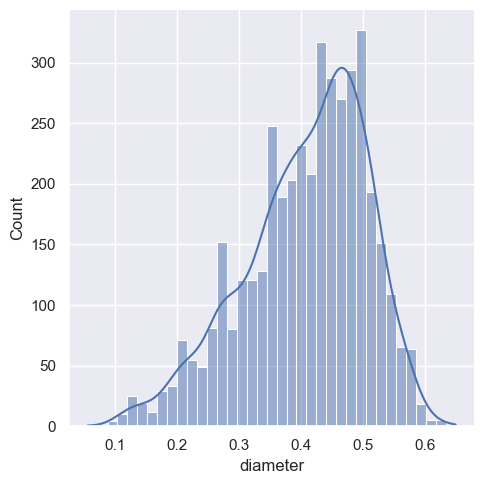

Skewness for the column is: height 3.1288173790659615
Distribution is right skewed.


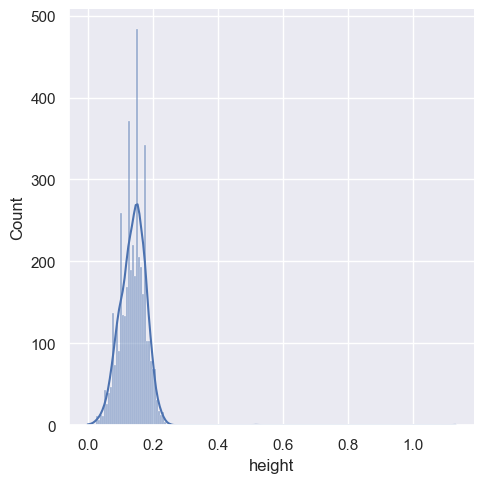

Skewness for the column is: whole_wt 0.5309585632523087
Distribution is right skewed.


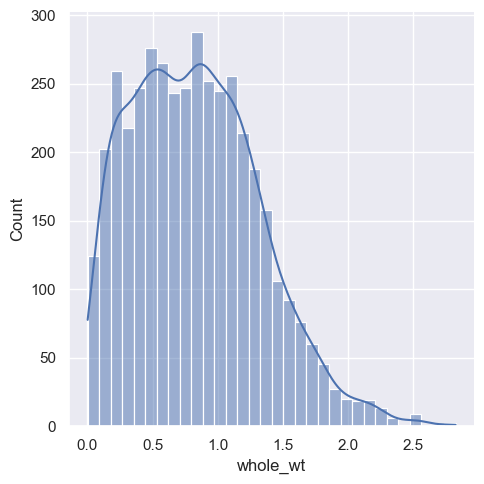

Skewness for the column is: shucked_wt 0.7190979217612694
Distribution is right skewed.


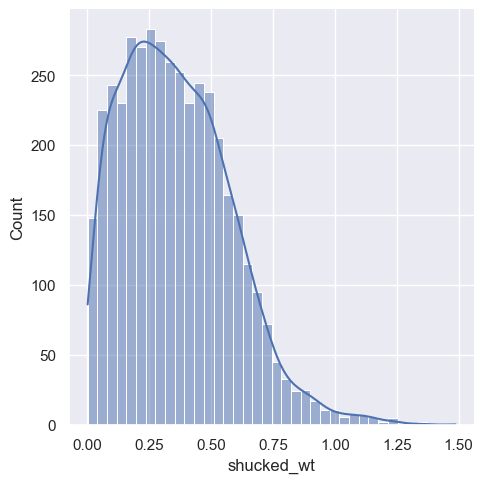

Skewness for the column is: viscera_wt 0.5918521514155083
Distribution is right skewed.


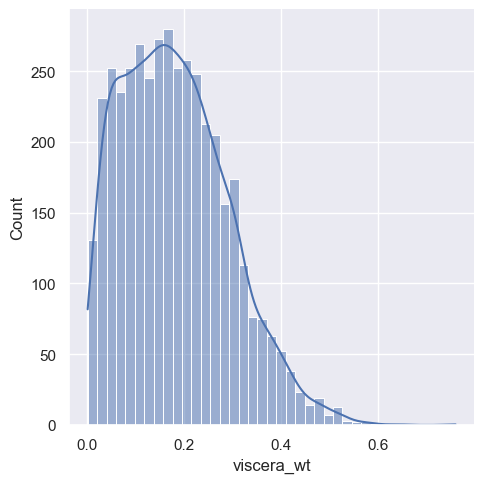

Skewness for the column is: shell_wt 0.6209268251392077
Distribution is right skewed.


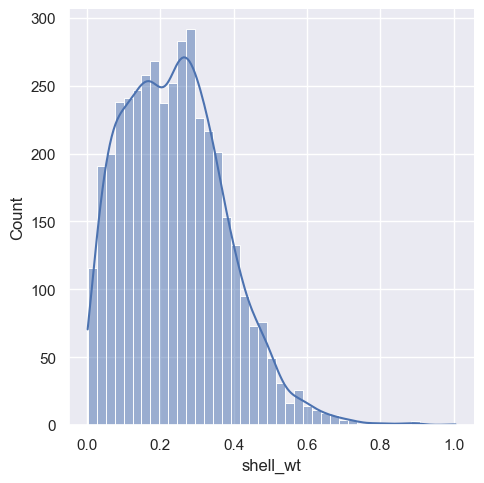

Skewness for the column is: rings 1.114101898355677
Distribution is right skewed.


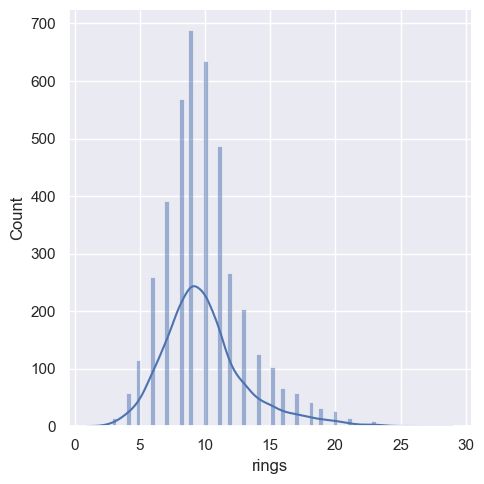

Skewness for the column is: age 1.114101898355677
Distribution is right skewed.


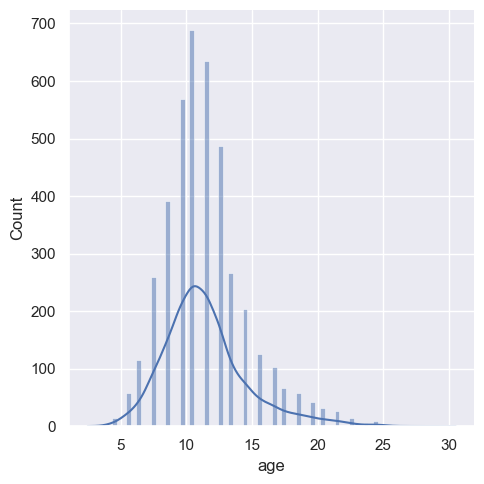

In [ ]:
# Checking the distribution for each column and printing their skewness value

check_distribution(df)

> The "height" column has a good amount of right skewness. Skrewness in other columns are still in considerable range and we can ignore them. For height column we would want to transform it to bring it closer to a normal distribution.

# 3. Preparing Data for Machine Learning Algorithms




In [ ]:
# printing head of the dataframe
df.head()

,Gender,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


### Looking into correlation again 

In [ ]:
 # We have set a threshold of >=0.8 to call 2 columns correlated
correlated_columns = find_correlated_features(df.drop(["age"], axis = 1), 0.8)

A feature is correlated if they have a correlation greater than or equal to 0.8

Correlated features are:

'diameter' and 'length' are correlated with a correlation value of:  0.99

'height' and 'length' are correlated with a correlation value of:  0.83

'height' and 'diameter' are correlated with a correlation value of:  0.83

'whole_wt' and 'length' are correlated with a correlation value of:  0.93

'whole_wt' and 'diameter' are correlated with a correlation value of:  0.93

'whole_wt' and 'height' are correlated with a correlation value of:  0.82

'shucked_wt' and 'length' are correlated with a correlation value of:  0.9

'shucked_wt' and 'diameter' are correlated with a correlation value of:  0.89

'shucked_wt' and 'whole_wt' are correlated with a correlation value of:  0.97

'viscera_wt' and 'length' are correlated with a correlation value of:  0.9

'viscera_wt' and 'diameter' are correlated with a correlation value of:  0.9

'viscera_wt' and 'whole_wt' are correlated with a corre

/var/folders/1b/6_jlthxx5rj3h57f1wxl2r9c0000gn/T/ipykernel_2324/1929201365.py:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


In [ ]:
# Correlated columns obtained, we would now be checking them with VIF
correlated_columns

{'diameter',
 'height',
 'length',
 'shell_wt',
 'shucked_wt',
 'viscera_wt',
 'whole_wt'}

In [ ]:
# calculating the VIF
calculate_vif(list(correlated_columns))

,Variable,VIF
0,shucked_wt,28.353191
1,shell_wt,21.258289
2,whole_wt,109.592750
3,height,3.559939
4,viscera_wt,17.346276
5,length,40.771813
6,diameter,41.845452


In [ ]:
# Lets remove variable which is giving highest VIF i.e whole wt and check the VIF again
calculate_vif(list(correlated_columns - set(["whole_wt"])))

,Variable,VIF
0,shucked_wt,8.852112
1,shell_wt,7.817781
2,height,3.558443
3,viscera_wt,10.697780
4,length,40.763955
5,diameter,41.819755


In [ ]:
# Lets remove variable which is giving high VIF's in order, we will keep on removing features. Till it gets down to 5 or less for all.
calculate_vif(list(correlated_columns - set(["whole_wt", "diameter"])))

,Variable,VIF
0,shucked_wt,8.851834
1,shell_wt,7.457755
2,height,3.509983
3,viscera_wt,10.690504
4,length,8.013867


In [ ]:
# Lets remove variable which is giving high VIF's in order, we will keep on removing features. Till it gets near to 5 or less for all.
calculate_vif(list(correlated_columns - set(["whole_wt", "diameter", "viscera_wt"])))

,Variable,VIF
0,height,3.489531
1,shucked_wt,6.114777
2,length,7.746817
3,shell_wt,6.598972


In [ ]:
# Lets remove variable which is giving high VIF's in order, we will keep on removing features. Till it gets near to 5 or less for all.
calculate_vif(list(correlated_columns - set(["whole_wt", "diameter", "viscera_wt", "length"])))

,Variable,VIF
0,height,3.135094
1,shucked_wt,4.709420
2,shell_wt,5.666451


> This looks good. We can stop here.

> we need to drop these variables.

In [ ]:
# VIF suggested we should drop these columns
df.drop(["whole_wt", "diameter", "viscera_wt", "length"], axis = 1, inplace = True)

#### Lets deal with skewness in height column

In [ ]:
print("Skewness before transformation: ", df["height"].skew())
print("Skewness after transformation: ", np.sqrt(df["height"]).skew())

# Performing sqrt transformation on heigh feature to reduce the skewness 
df["height"] = np.sqrt(df["height"])

Skewness before transformation:  3.1288173790659615
Skewness after transformation:  -0.29564050925436225


In [ ]:
# Gender column still needs to be encoded
df['Gender'].unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
# Changing binary categories to 1s and 0s
# df.Gender = pd.Categorical(df.Gender)
# df['Gender'] = df.cc.cat.codes
# # df['Gender'] = df['Gender'].astype('category').apply(lambda x: x.cat.codes)


LE = LabelEncoder()
df['Gender'] = LE.fit_transform(df['Gender'])

#### Splitting data to X and y

In [ ]:
# Splitting our data to x and y feature sets
X = df.drop(['age'], axis = 1)
y = df.age

#### Train Test Split

In [ ]:
# creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


# 4. Modeling our Data

#### Linear Regression

In [ ]:
# Training a linear regression model and predicting with it. Also evaluating on the test set.
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

1.0


**Score** is the R2 score, which varies between 0 and 100%. It is closely related to the MSE but not the same. 

Wikipedia defines r2 like this, ” … is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).” Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

In [ ]:
# Feature interpretation using eli5
eli5.show_weights(lr, feature_names=list(X_train.columns))


Weight?,Feature
+1.500,<BIAS>
+1.000,rings
+0.000,shucked_wt
-0.000,Gender
-0.000,height
-0.000,shell_wt


> rings is the most important feature for linear regression model.

In [ ]:
# creating a result dataframe comparing actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
668,14.5,14.5
1580,9.5,9.5
3784,12.5,12.5
463,6.5,6.5
2615,13.5,13.5
...,...,...
1420,12.5,12.5
2104,12.5,12.5
3382,16.5,16.5
3424,11.5,11.5


In [ ]:
# Normalize the data

sc = StandardScaler()

X_train = pd.DataFrame(data = sc.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(data = sc.transform(X_test), columns = X_test.columns)

In [ ]:
# this is the normalized set
X_train

,Gender,height,shucked_wt,shell_wt,rings
0,-0.064504,-0.810057,-0.752632,-0.825276,-0.921055
1,1.145242,0.305345,0.784560,-0.469265,-0.610232
2,1.145242,0.638647,0.642561,0.807342,0.011413
3,1.145242,-1.382900,-1.325134,-1.235229,-0.610232
4,-1.274251,1.262564,1.566679,1.976066,0.633058
...,...,...,...,...,...
3127,1.145242,1.060297,1.359316,1.695572,0.011413
3128,-1.274251,0.073796,0.800337,0.314680,0.633058
3129,1.145242,0.190569,0.450976,0.088127,0.011413
3130,-1.274251,0.638647,0.514086,0.555617,-0.299410


In [ ]:
# we have not normalized y column
pd.DataFrame(y_train).head()

,age
940,8.5
2688,9.5
1948,11.5
713,9.5
3743,13.5


#### Multiple Linear regression

In [ ]:
# Import Linear Regression model and fitting it

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [ ]:
# Import polynomial Regression model and fitting it

polynomial_features = PolynomialFeatures(degree=3)  # Create a PolynomialFeatures instance in degree 3
x_train_poly = polynomial_features.fit_transform(X_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.fit_transform(X_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [ ]:

# Import Decision Tree Regression model  and fitting it

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(max_depth=5, random_state=13)

In [ ]:

# Import Random Forest Regression model and fitting it

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(max_depth=5, n_estimators=400, random_state=13)

**NOTE:**
**n_estimators** represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

In [ ]:
# Import SVR model and fitting it

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=1000, gamma='auto', kernel='linear')

### Evaluating Multiple Linear Regression Model

In [ ]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -11.695303611262062
Testing Accuracy for Multiple Linear Regression Model:  -11.505379450380214
RMSE for Training Data:  11.463282247765006
RMSE for Testing Data:  11.463282247765006
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.9977829708818656


In [ ]:
# Feature interpretation using eli5
eli5.show_weights(multiple_linear_reg, feature_names=list(X_train.columns))


Weight?,Feature
+3.217,rings
+0.000,shucked_wt
+0.000,height
+0.000,Gender
-0.000,shell_wt


> Rings again is the most important feature for multiple regression.

###  Evaluating Polynomial Regression Model

In [ ]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train)

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test)

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR)

Training Accuracy for Polynomial Regression Model:  1.0
Testing Accuracy for Polynomial Regression Model:  1.0
RMSE for Training Data:  3.8815437508654066e-14
RMSE for Testing Data:  2.385895173966505e-14
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  1.0


###  Evaluating Decision Tree Regression Model

In [ ]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.9992280775495894
Testing Accuracy for Decision Tree Regression Model:  0.9987415034784137
RMSE for Training Data:  0.08938698233063695
RMSE for Testing Data:  0.1149970126156363
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.9987245506554732


In [ ]:
# Feature interpretation using eli5

eli5.show_weights(decision_tree_reg, feature_names=list(X_train.columns))


Weight,Feature
1.0000,rings
0,shell_wt
0,shucked_wt
0,height
0,Gender


> The rules can be seen here for decision tree. Also the order of importance.

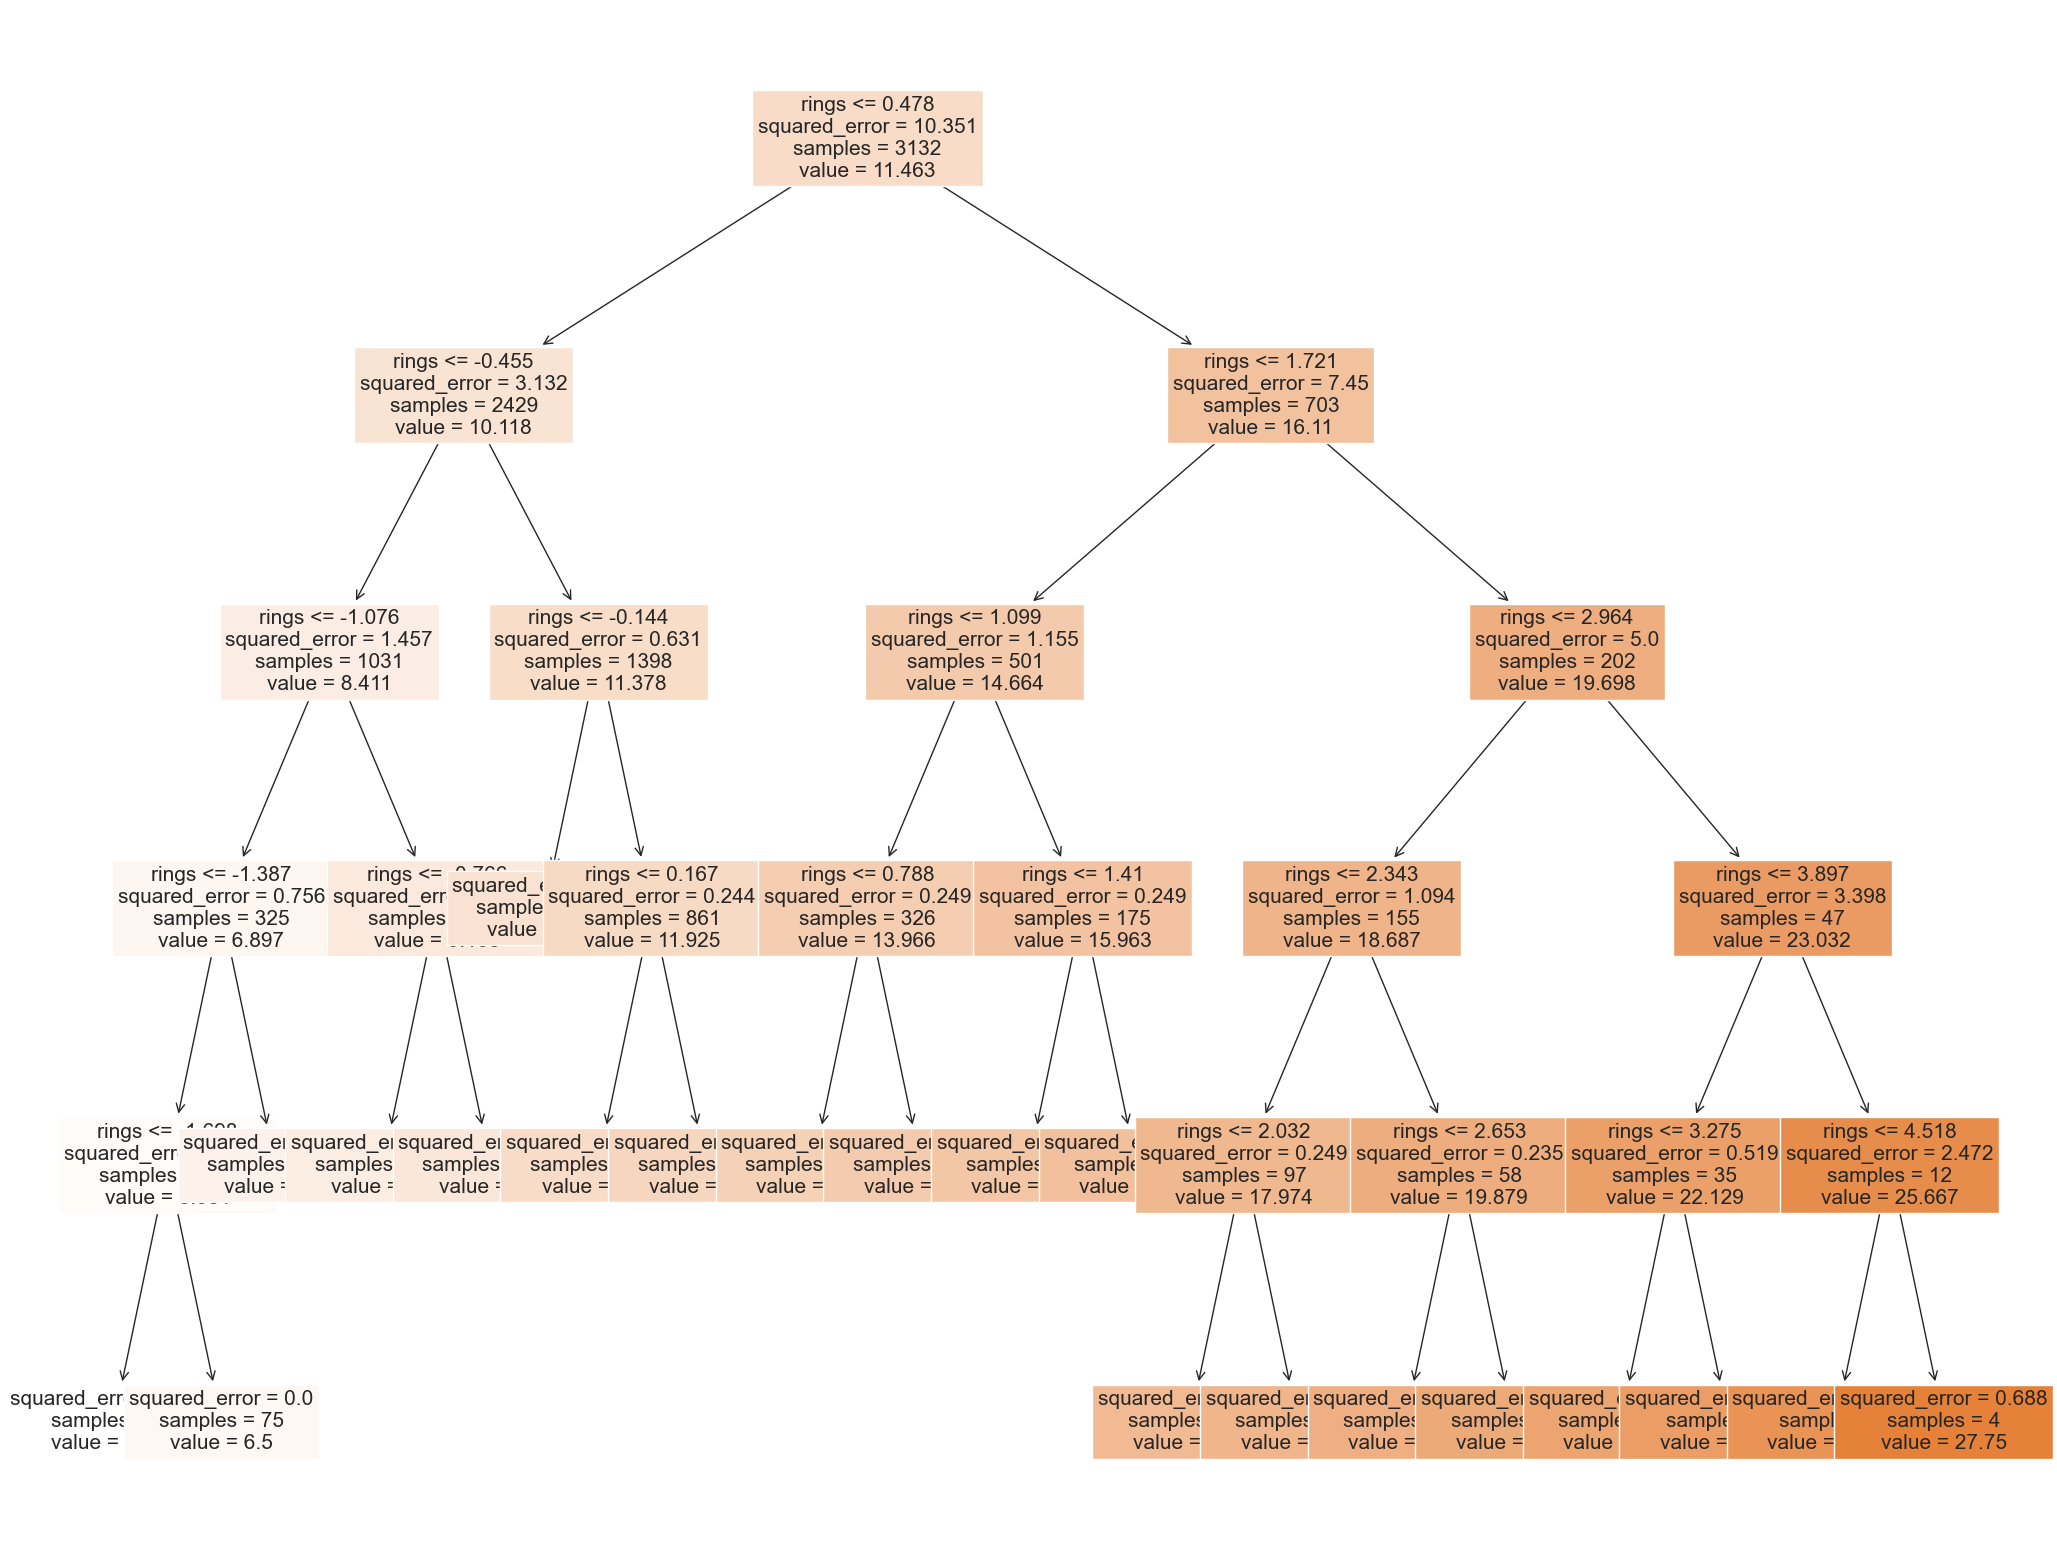

In [ ]:
# Printing our decision tree and the rules created
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_reg, 
                   fontsize=15,
                   feature_names=X_train.columns,  
                   filled=True)

### Evaluating Random Forest Regression Model

In [ ]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.9995390056943887
Testing Accuracy for Random Forest Regression Model:  0.9988598457958933
RMSE for Training Data:  0.06907727871929971
RMSE for Testing Data:  0.10945669865273651
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.9993080864992522


In [ ]:
# Feature interpretation using eli5

eli5.show_weights(random_forest_reg, feature_names=list(X_train.columns))


Weight,Feature
0.9999 ± 0.0005,rings
0.0000 ± 0.0004,shell_wt
0.0000 ± 0.0003,height
0.0000 ± 0.0001,shucked_wt
0 ± 0.0000,Gender


### Evaluating Support Vector Regression Model

In [ ]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train)

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test)

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR)

Training Accuracy for Support Vector Regression Model:  0.9997279481801924
Testing Accuracy for Support Vector Regression Model:  0.9997322569545367
RMSE for Training Data:  0.05306562181146528
RMSE for Testing Data:  0.05304197031738875
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.9997894887568345


In [ ]:
# Feature interpretation using eli5

eli5.show_weights(support_vector_reg, feature_names=list(X_train.columns))


Weight?,Feature
+11.509,<BIAS>
+3.182,rings
+0.021,shell_wt
+0.005,Gender
+0.004,height
-0.009,shucked_wt


### Final Results

In [ ]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-11.695304,-11.505379,1.146328e+01,1.146328e+01,0.997783
Polynomial Regression,fit_intercept=False,1.000000,1.000000,3.881544e-14,2.385895e-14,1.000000
Decision Tree Regression,max_depth=5,0.999228,0.998742,8.938698e-02,1.149970e-01,0.998725
Random Forest Regression,"n_estimators=400, max_depth=5",0.999539,0.998860,6.907728e-02,1.094567e-01,0.999308
Support Vector Regression,"kernel=”linear”, C=1000",0.999728,0.999732,5.306562e-02,5.304197e-02,0.999789


## Linear Regression Modelling with only one feature Rings as it has a perfect correlation

In [ ]:

X = np.array(df.rings).reshape(-1, 1)
y = df.age


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

1.0


### Best regressor here is linear regressor using only one feature - Rings

**R^2 (coefficient of determination) regression score function.**

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

## Conclusion:


The problem at hand is a regression problem where target variable is age. The data here has 4177 rows and 10 columns. There were no null values in the data and no duplicate rows. However, there was skewness which was dealt with transformation. There were also multicollinearity in the features which was identified using pearson correlation and VIF, we dropped some features. It was a default split. Once all the data cleaning was done we moved on to modelling. 

The models tried here were: Multiple linear regression, decision tree regressor, random forest regressor, support vector regressor and polynomial regression. While modelling, also did a k fold cross validation using 10 folds. Except for multiple linear regression, all other models performed well on r2 score. This being a regression task our main metrices here would be r2 score and root mean square error. Most of the models were pretty stable in the context of their train and testing score were pretty close to each other. The best model although would be polynomial regression: Its the most stable model here. We also did feature interpretation for all the models and feature "Rings" gave a very positive score suggesting it is contributing the most to the model's prediction, rings also had a very high correlation with target feature Age.

Post this, we dropped all the independent features and just kept rings. And created a model again, we got similar scores thus confiming that RINGS is contributing to the predictions alone.
